# Занятие 6

######    1) Проект
###### 2) Визуализация



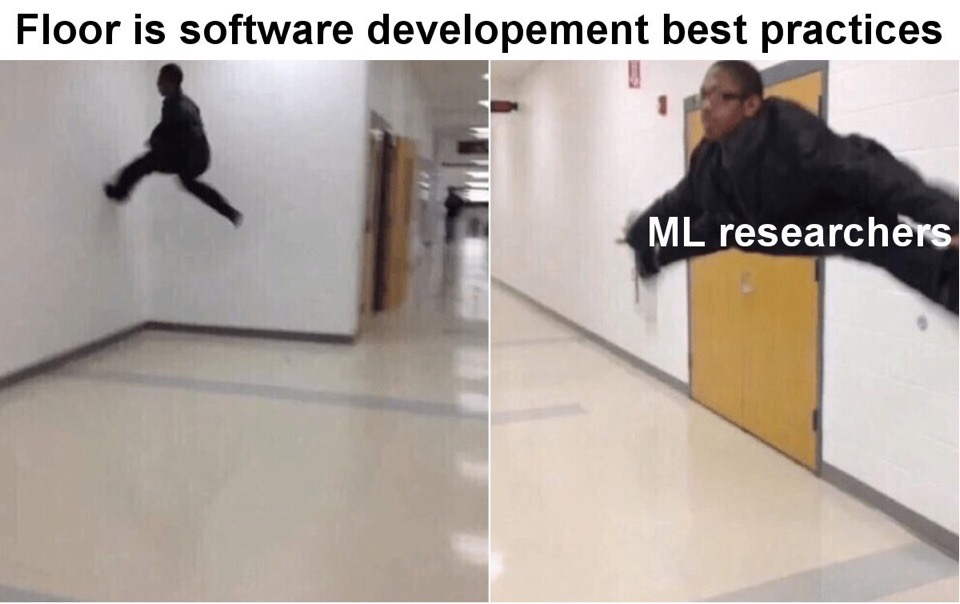

# Проект

Используете ваш датасет по кластеризации, либо выбираете новый

###### 0) Изучаете контекст датасета и придумываете бизнес-цель 

###### 1) Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )

###### 2) Оценка Датасета (pandas/np/statsmodel...)

###### 3) Подготовка данных

###### 4) Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)

###### 5) Итоговые визуализации и выводы

###### 6) Предложения по развитию вашей работы

# Визуализация

Построение графиков это такая тема, которую невозможно охватить всю. У вас всё равно будет когда-то пример, который здесь не охвачен.



matplotlib — не единственный пакет для построения графиков, правда чаще всего остальные графопостроители просто делают более удобную обёртку вокруг него. Для графиков, которые регулярно встречаются при анализе данных есть bokeh и seaborn.

Ну и конечно если у вас уже есть какой-то сторонний пакет или библиотека (origin, gnuplot, flot, d3js), с который вы уже умеете строить графики, может оказаться проще с помощью питона переформатировать данные, а отображение делать уже в том, в чём вы чувствуюте себя комфортней.



Однако не стоит забывать, что если у вас задача потоковой обработки данных, и данных много и хочется построить сразу много графиков, то скорее всего построить весь конвейер на питоне будет относительно просто.



Disclaimer большинство примеров здесь, конечно же, основаны на общедоступных туториалах и книгах. Nevertheless, все опечатки и не точности, что вы тут найдёте — на моей совести.



## matplotlab

Первое, что надо сделать, когда работаешь с matplotlab в jupyter, это "включить" соответствующую магию. Тогда картинки будут отображаться прямо в тексте.

(для старых версий)

In [3]:
%matplotlib inline


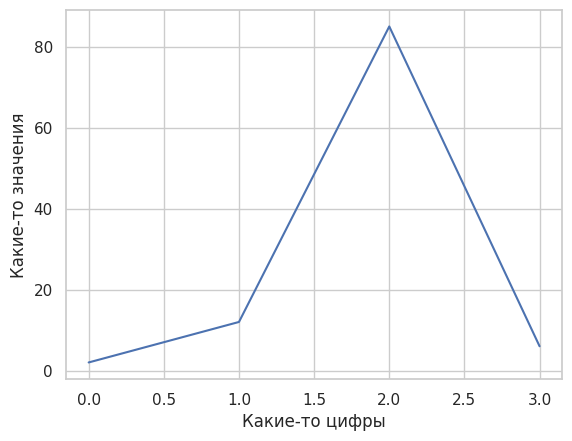

In [110]:
import matplotlib.pyplot as plt

# plt.title("Пример с автоматически выбранным стилем")
plt.plot([2, 12, 85, 6])
plt.xlabel("Какие-то цифры")
plt.ylabel("Какие-то значения")
plt.show()

Команда plot достаточно умна и универсальна, ей можно скармливать данные в разных вариантах и она довольно часто будет делать то, что вы ожидаете.

Когда на вход просто последовательность чисел, это воспринимается как значения по вертикальной оси, а по горизонтальной оси эти значения будут просто индексом (именно поэтому в примере выше у 2.0 значение 80
Когда на вход две последовательности, то функция сначала соберёт пары (x, y), последовательно перебирая каждую из последовательностей

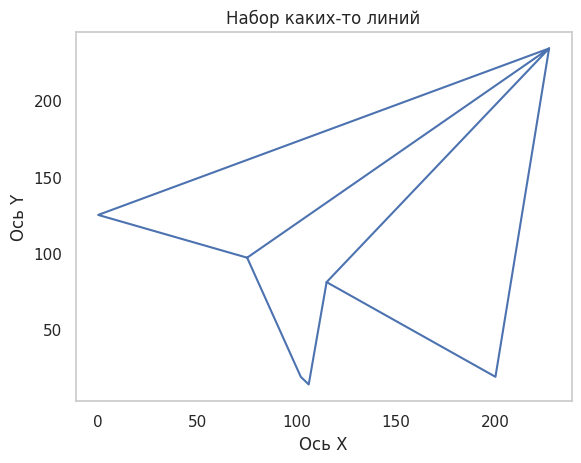

In [111]:
plt.plot(
    [75, 227, 0, 75, 102, 106, 115, 200, 227, 115],
    [97, 234, 125, 97, 19, 14, 81, 19, 234, 81]
)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Набор каких-то линий")
plt.grid(False)
plt.show()

Это очень удобно, когда вы пытаетесь построить функции, если вы примерно понимаете, в каком диапазоне и зачем, и помните как пользоваться numpy



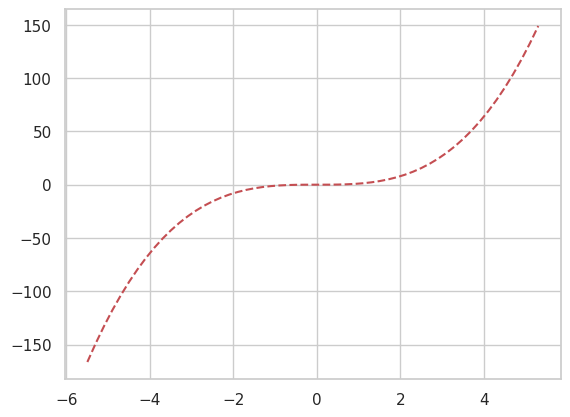

In [112]:
import numpy as np

xx = np.arange(-5.5, 5.5, 0.2)

plt.plot(xx, xx**3, 'r--')
plt.show()

Когда картинку надо сохранить в файл, вместо plt.show используйте plt.savefig. У команды есть некоторые дополнительные параметры, можно, например, указать dpi



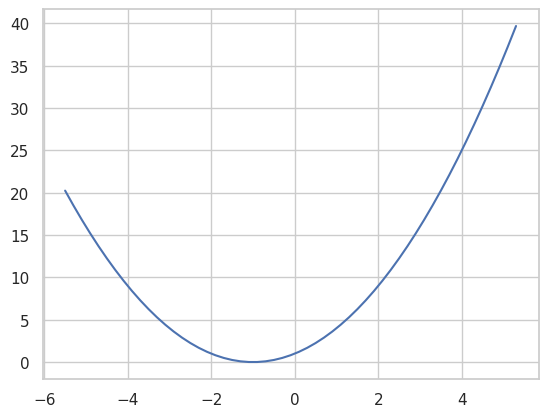

In [117]:
plt.plot(xx, xx**2 + 2*xx + 1, 'b-')
plt.savefig("cuboid.png",dpi=1000)

###### Как настроить внешний вид


Настроить можно много всего, например вид линии, длина штрихов, ширина, цвет, подписи, метки на осях ну и том подобное. Есть три способа задать свойства графика, ну и понятно многие из свойств можно установить несколькими способами.



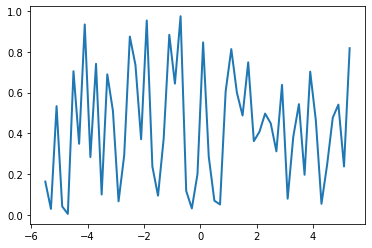

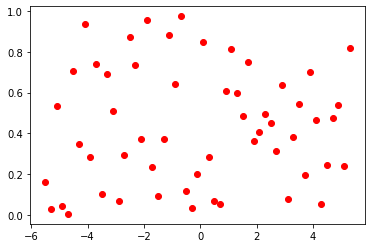

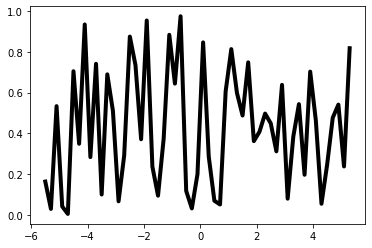

In [11]:
yy = np.random.rand(len(xx))

# через keyword аргументы когда вы закончили уже передавать данные
plt.plot(xx, yy, linewidth=2.0)
plt.show()

# через "третий аргумент". Здесь задаём что у нас красные точки
plt.plot(xx, yy, 'r.', markersize=12)
plt.show()

# можно разделить сам процесс набрасывания точек и финтифлюшки
line = plt.plot(xx, yy)
plt.setp(line, color="k", linewidth=4.0)
plt.show()

Вот некоторые из свойств, которые можно выставить у линии:

    alpha (float) регулирует прозрачность
    color (str) это цвет
    markersize (float) это размер значка
    linestyle стиль линии, например: '-', '--', '-.', ':'
    zorder (float) регулирует порядок графиков, когда у вас их несколько и вы хотите их особым образом накладывать друг на друга
    plt.xlim и plt.ylim позволяют задать диапазоны значений

Если вы уже что-то построили, можно посмотреть, с какими настройками это произошло, что с этим теперь будет, и, может, придумать что можно поменять



  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: floa

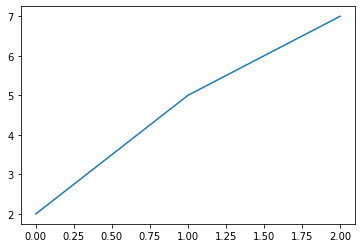

In [12]:
line = plt.plot([2, 5, 7])
plt.setp(line)

###### Сразу несколько графиков


Иногда бывает надо показать зависимость нескольких переменных одновременно и неразрывно. На помощь приходит супер-хитрая система подграфиков в matplotlib. У неё замороченный синтаксис, но в примере внизу мы неявно определяем грид в 2 строчки 3 столбца и сначала рисуем 1 картинку в таком гриде, а потом пятую.



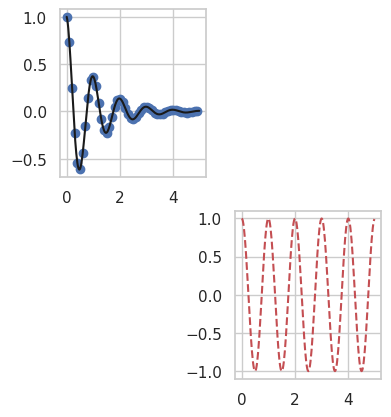

In [121]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(231)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(235)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Можно рисовать сразу несколько графиков, это бывает удобно если у вас какая-то сложная логика их построения. В таком случае надо явно давать понять matplotlib-у, какой график вы собираетесь сейчас настроить

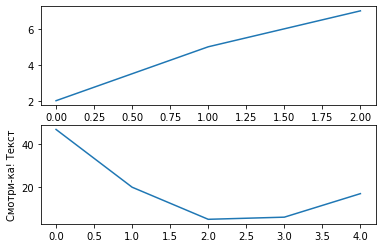

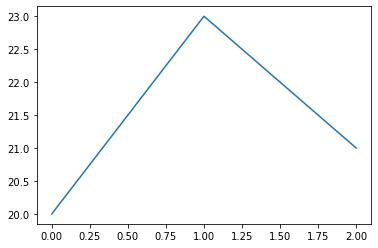

In [14]:
plt.figure(1)
plt.subplot(211)
plt.plot([2, 5, 7])
plt.subplot(212)
plt.plot([47, 20, 5, 6, 17])
plt.ylabel("Смотри-ка! Текст")

plt.figure(2)
plt.plot([20, 23, 21])

plt.show()

Для некоторых графиков полезно ещё перестраивать их в логарифмических осях, к примеру.



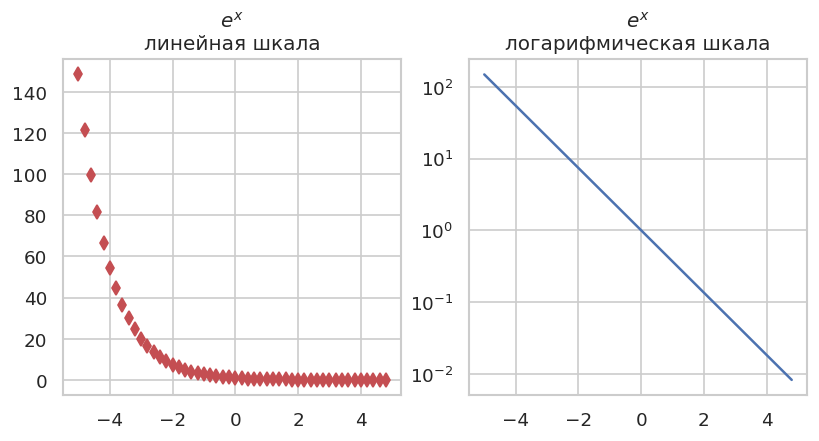

In [125]:
xx = np.arange(-5, 5, 0.2)
yy = np.exp(-xx)

plt.figure(figsize=(8, 8), dpi=120)

plt.subplot(221)
plt.plot(xx, yy, 'rd')
# plt.yscale('linear')
plt.title('$e^x$\nлинейная шкала')
# plt.grid(True)


# log
plt.subplot(222)
plt.plot(xx, yy)
# plt.ylim(1E-3, 1E3)
plt.yscale('log')
plt.title('$e^x$\nлогарифмическая шкала')
plt.grid(True)

###### Другие виды графиков


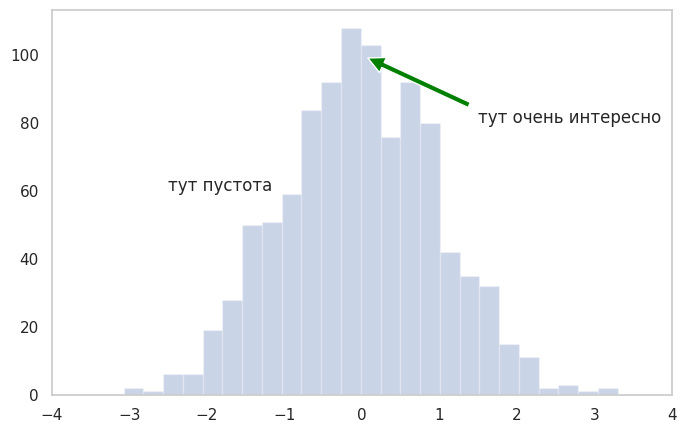

In [128]:
xx = np.random.normal(size=1000)

plt.figure(figsize=(8, 5))
plt.hist(xx, bins=25, alpha=0.3)
plt.text(-2.5, 60, "тут пустота")
plt.xlim(-4, 4)
plt.annotate(
    'тут очень интересно', xy=(0, 100), xytext=(1.5, 80),
    arrowprops=dict(facecolor="green", shrink=0.05)
)
plt.grid(False)
plt.show()

К графикам также можно добавлять легенду



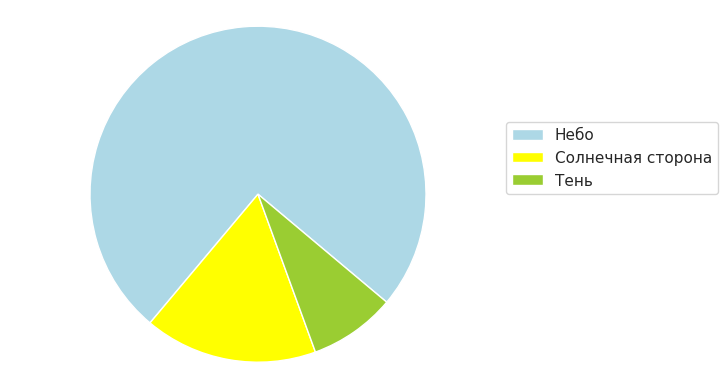

In [129]:
labels = ["Небо", "Солнечная сторона", "Тень"]
sizes = [270, 60, 30] # будет отмасштабировано
colors = ["lightblue", "yellow", "yellowgreen"]

plt.pie(sizes, colors=colors, startangle=-40)
plt.axis("equal")
plt.legend(labels, loc=(1, 0.5))
plt.show()

К сожалению, для сложных случаев всё равно надо сильно заморочиться, без этого не получится. Ниже чуток подтюненый пример из документации scipy, детально состоящий из нескольких частей: мы определили функцию, определили грид и синтерполировали грид на доступные точные значения.



Пример скорее демонстрационный, не переживайте если наскоком не всё поймёте



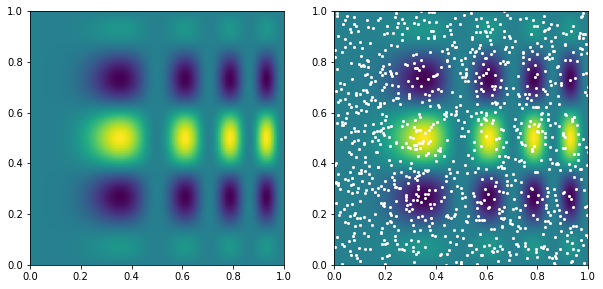

In [18]:
from scipy.interpolate import griddata

XMIN, XMAX, YMIN, YMAX = 0, 1, 0, 1

def func(x, y):    
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
    #return x * np.exp(-x**2 - y**2)

# пусть у нас есть грид
grid_x, grid_y = np.mgrid[XMIN:XMAX:100j, YMIN:YMAX:100j]

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

zi = griddata(points, values, (grid_x, grid_y), method="linear")
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(func(grid_x, grid_y), extent=(XMIN, XMAX, YMIN, YMAX))
plt.ylim(XMIN, XMAX)
plt.xlim(YMIN, YMAX)
plt.grid(False)


plt.subplot(122)
plt.imshow(func(grid_x, grid_y), extent=(XMIN, XMAX, YMIN, YMAX))

plt.plot(points[:,0], points[:,1], 'w.', ms=4)
plt.ylim(XMIN, XMAX)
plt.xlim(YMIN, YMAX)
plt.grid(False)
plt.show()

###### Подогнать под данные функцию


Нужна функция, данные и scipy.optimize.curve_fit сделает всё за вас



In [20]:
from scipy.optimize import curve_fit


7.204*sin(2.002)*x


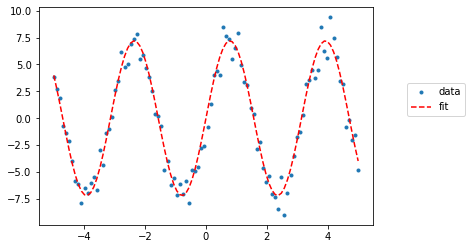

In [21]:
x_data = np.linspace(-5, 5, num=100)
y_data = 7 * np.sin(2 * x_data) + np.random.normal(size=100)

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = curve_fit(
    test_func, x_data, y_data, p0=[2, 2]
)
print(f"{params[0]:.3f}*sin({params[1]:.3f})*x")

plt.plot(x_data, y_data, '.')
plt.plot(
    x_data,
    [test_func(x, params[0], params[1]) for x in x_data],
    'r--'
)
plt.legend(["data", "fit"], loc=(1.1, 0.5))
plt.show()

У scipy.optimize есть ещё полезные функции для нахождения минимумов, поиска корней, и тому подобного



https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

## Статистические графики с seaborn


seaborn это надстройка над matplotlib, у которого куча встроенных удобных определённых графиков уже настроено. Иногда там есть то, что в "голом" matplotlib может быть построить муторно.



/tmp/ipykernel_612/1897940164.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values);


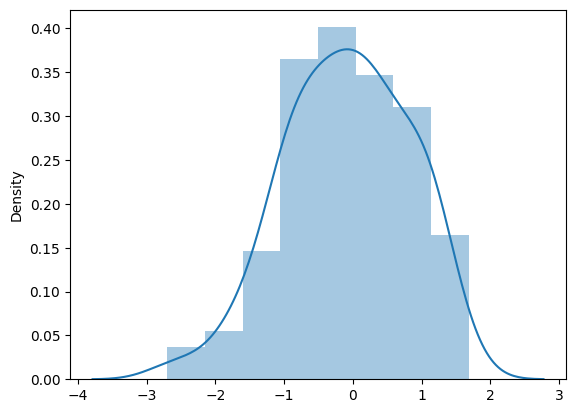

In [1]:
import seaborn as sns

values = np.random.normal(size=100)
sns.distplot(values);


/tmp/ipykernel_612/577715247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=20, kde=False, rug=True);


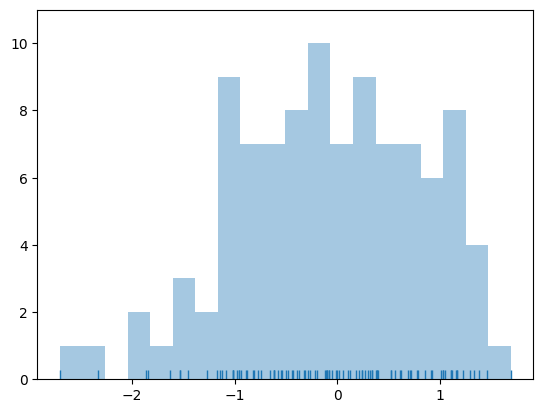

In [2]:
sns.distplot(values, bins=20, kde=False, rug=True);


/tmp/ipykernel_612/3259017408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist=False, rug=True);


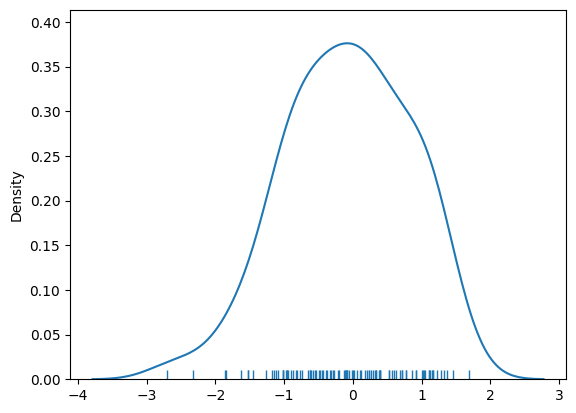

In [3]:
sns.distplot(values, hist=False, rug=True);


/tmp/ipykernel_612/3603010591.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, shade=True);


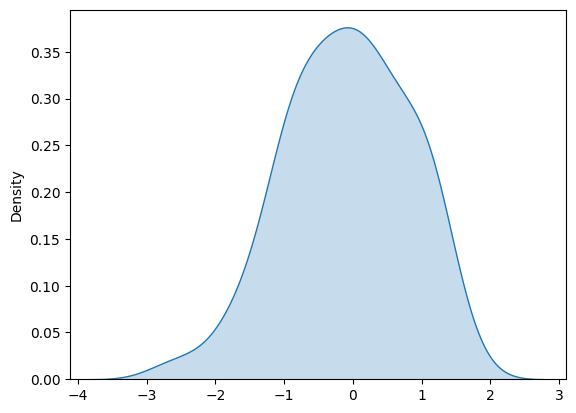

In [4]:
sns.kdeplot(values, shade=True);


Что такое Kernel Density Estimation можно почитать в википедии https://en.wikipedia.org/wiki/Kernel_density_estimation

In [5]:
import pandas as pd


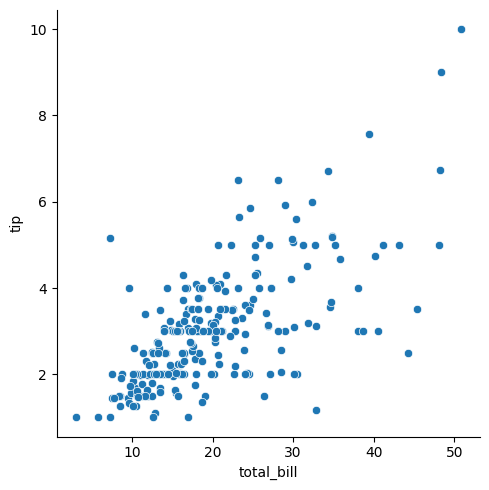

In [6]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [7]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Хотя точки отображаются в двух измерениях, к графику можно добавить еще одно измерение, раскрасив точки в соответствии с третьей переменной. В Seaborn это называется использованием «семантики оттенка», потому что цвет точки приобретает значение:



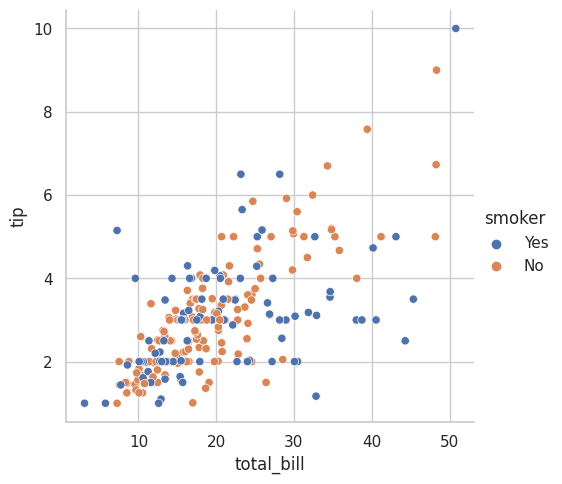

In [130]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

Чтобы подчеркнуть разницу между классами и улучшить доступность, вы можете использовать разные стили маркеров для каждого класса:



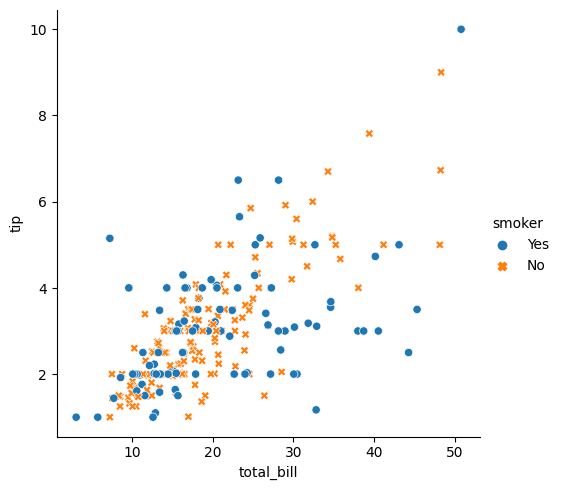

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

Также возможно представить четыре переменные, изменяя оттенок и стиль каждой точки независимо. Но делать это нужно осторожно, ведь к форме глаз гораздо менее чувствителен, чем к цвету:



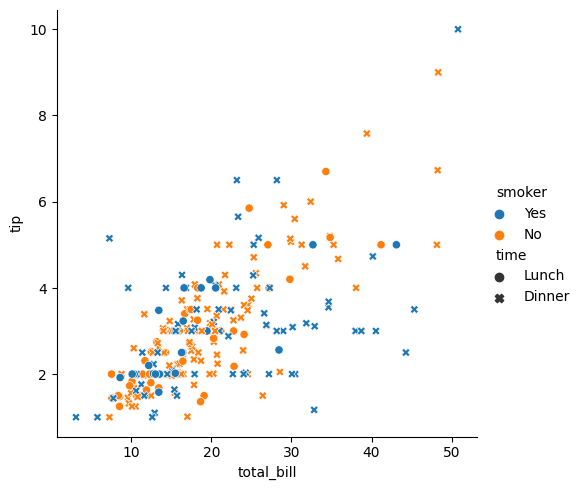

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);


В приведенных выше примерах семантика оттенка была категориальной, поэтому была применена качественная палитра по умолчанию . Если семантика оттенка является числовой (в частности, если она может быть преобразована в плавающую), раскраска по умолчанию переключается на последовательную палитру:



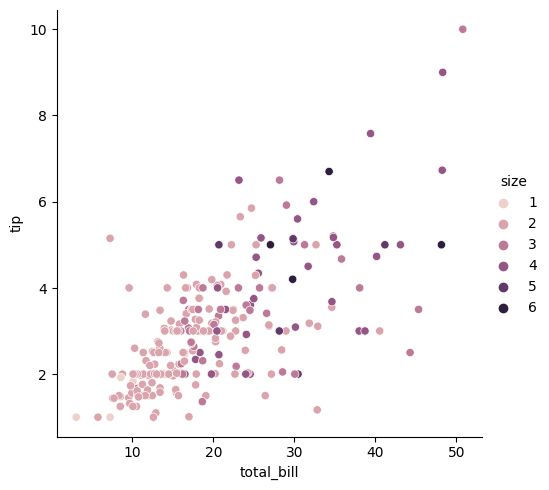

In [11]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);


В обоих случаях вы можете настроить цветовую палитру. Для этого есть много вариантов. Здесь мы настраиваем последовательную палитру, используя строковый интерфейс cubehelix_palette():



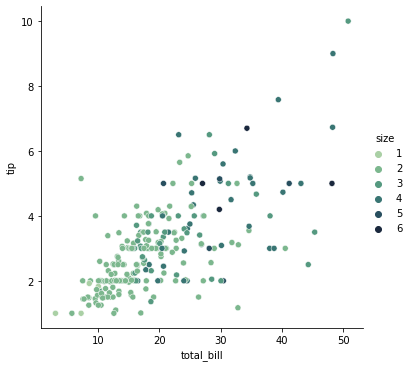

In [33]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);


Семантическая переменная третьего типа изменяет размер каждой точки:



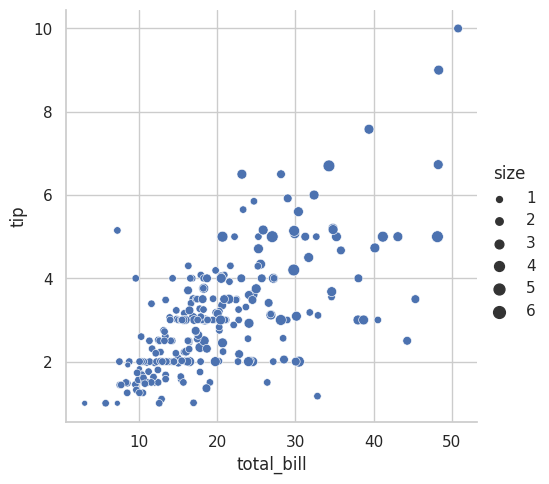

In [132]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);


В отличие от matplotlib.pyplot.scatter(), буквальное значение переменной не используется для выбора области точки. Вместо этого диапазон значений в единицах данных нормализуется до диапазона в единицах площади. Этот диапазон можно настроить:



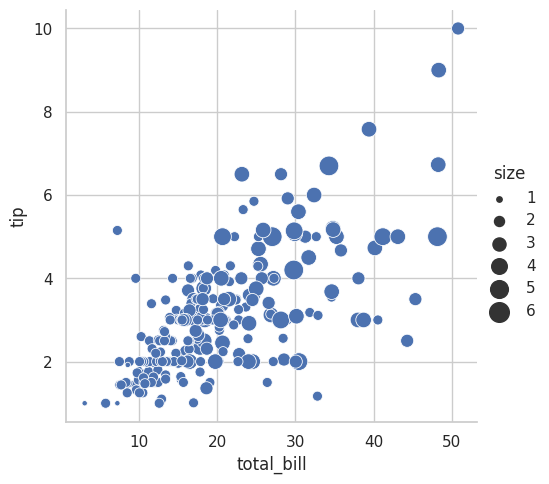

In [131]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);


###### Подчеркивание непрерывности с помощью линейных графиков 


Графики рассеяния очень эффективны, но не существует универсально оптимального типа визуализации. Вместо этого визуальное представление должно быть адаптировано к специфике набора данных и к вопросу, на который вы пытаетесь ответить с помощью графика.



С некоторыми наборами данных вы можете захотеть понимать изменения одной переменной как функцию времени или аналогичную непрерывную переменную. В этой ситуации хорошим выбором является построение линейного графика. В seaborn это может быть выполнено с помощью lineplot()функции либо напрямую, либо с relplot()помощью установки kind="line":



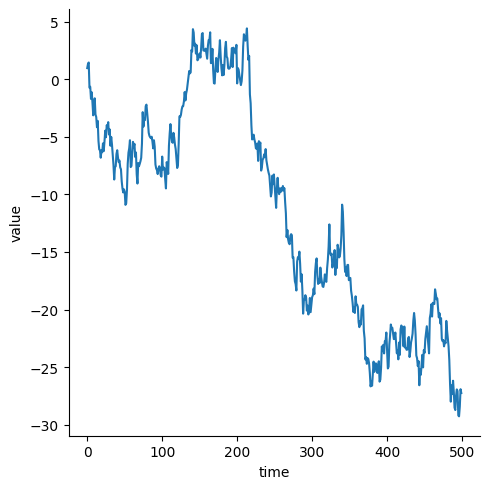

In [14]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
plt.show()

Поскольку lineplot()предполагает, что вы чаще всего пытаетесь рисовать y как функцию x, поведение по умолчанию заключается в сортировке данных по x значениям перед построением графика. Однако это можно отключить:



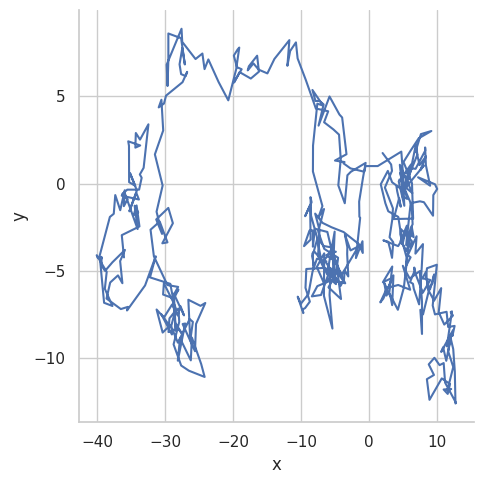

In [145]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

###### Агрегирование и представление неопределенности 


Более сложные наборы данных будут иметь несколько измерений для одного и того же значения x переменной. Поведение по умолчанию в seaborn заключается в объединении нескольких измерений для каждого x значения путем построения среднего значения и 95% доверительного интервала вокруг среднего значения:



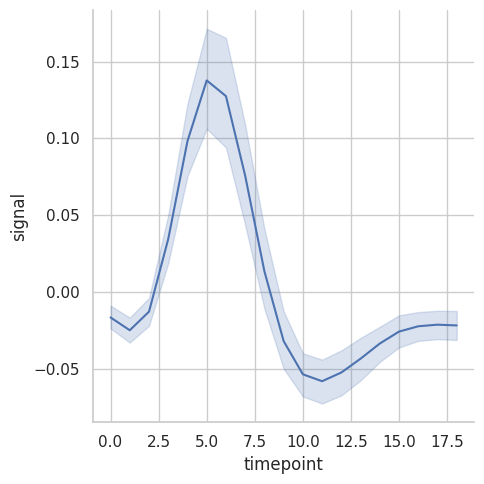

In [149]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

Доверительные интервалы вычисляются с использованием начальной загрузки, которая может занять много времени для больших наборов данных. Поэтому их можно отключить:



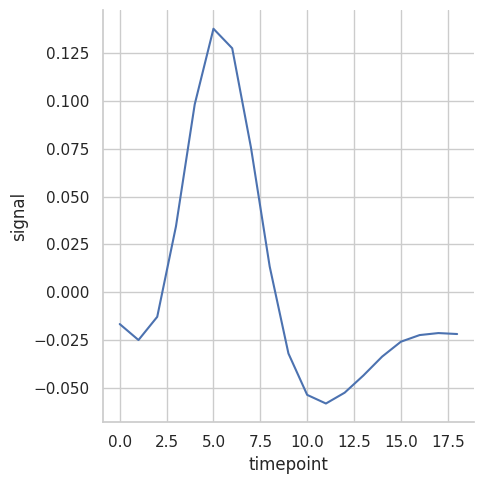

In [152]:
sns.relplot(x="timepoint", y="signal", errorbar=None, kind="line", data=fmri);


Еще один хороший вариант, особенно с большими данными, — представить разброс распределения в каждый момент времени путем построения стандартного отклонения вместо доверительного интервала:



/mnt/c/c/ds/env/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




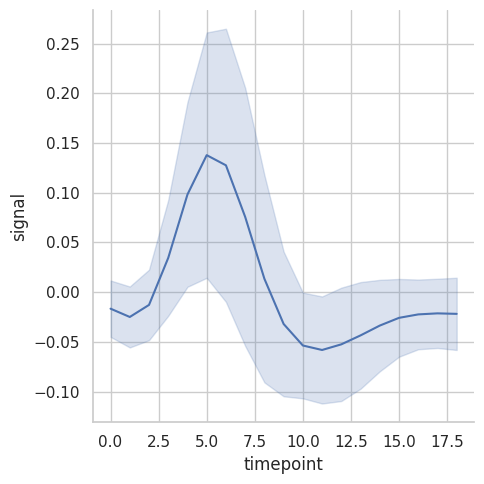

In [153]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);


Чтобы полностью отключить агрегирование, установите для estimator параметра значение None Это может привести к странному эффекту, если данные имеют несколько наблюдений в каждой точке.



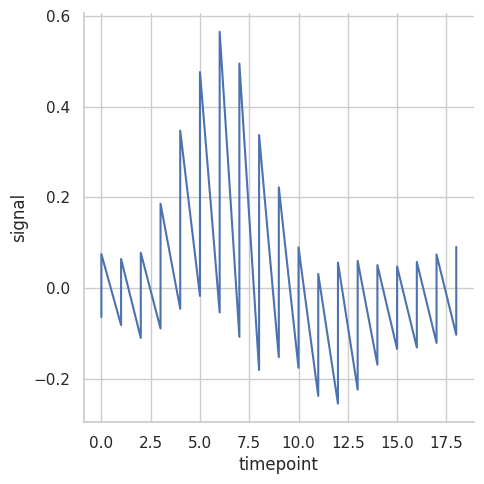

In [154]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);


###### Отображение подмножеств данных с помощью семантических отображений ¶


Функция lineplot()обладает той же гибкостью, что и scatterplot(): она может отображать до трех дополнительных переменных, изменяя оттенок, размер и стиль элементов графика. Это делается с использованием того же API scatterplot(), что и , а это означает, что нам не нужно останавливаться и думать о параметрах, которые контролируют внешний вид линий и точек в matplotlib.



Использование семантики lineplot()также определяет способ агрегирования данных. Например, добавление семантики оттенка с двумя уровнями разбивает график на две линии и полосы ошибок, окрашивая каждую, чтобы указать, какому подмножеству данных они соответствуют.



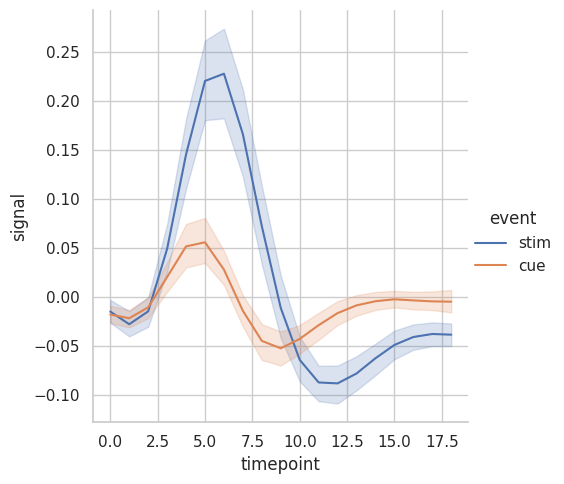

In [155]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);


Добавление семантики стиля к линейному графику изменяет шаблон штрихов в линии по умолчанию:



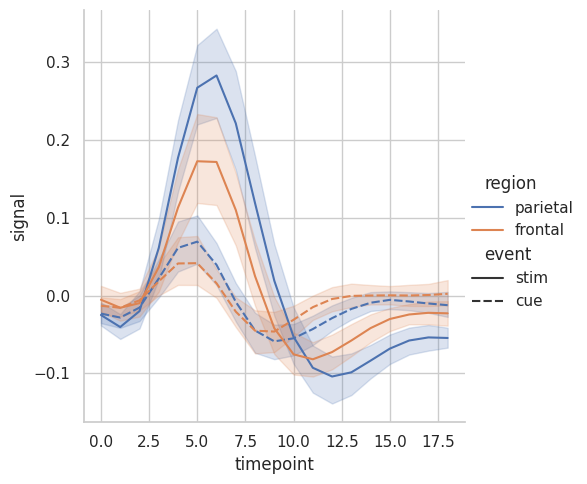

In [156]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

Но вы можете идентифицировать подмножества по маркерам, используемым при каждом наблюдении, либо вместе с черточками, либо вместо них:



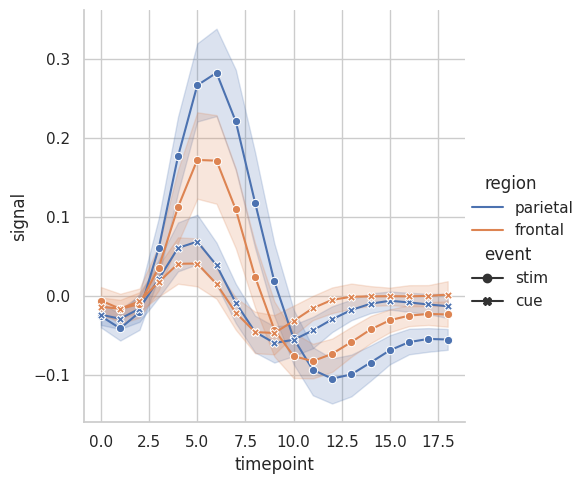

In [157]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

###### Отображение нескольких графиков

 Поскольку relplot()он основан на FacetGrid, это легко сделать. Чтобы показать влияние дополнительной переменной, вместо того, чтобы отводить ей одну из смысловых ролей в сюжете, используйте ее для «фасетирования» визуализации. Это означает, что вы делаете несколько осей и наносите подмножества данных на каждую из них:

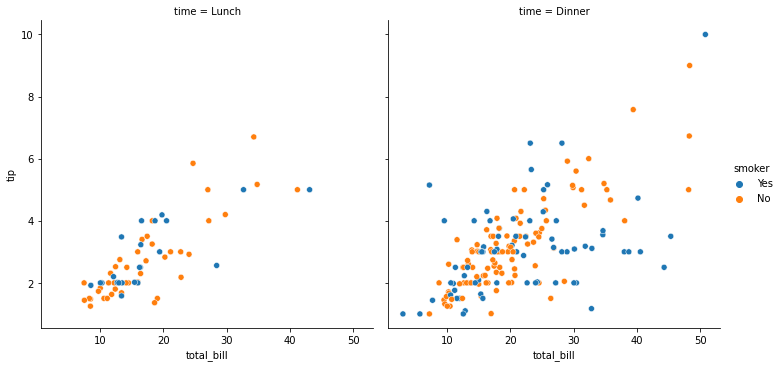

In [51]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

Вы также можете показать влияние двух переменных таким образом: одну, огранив столбцы, и одну, огранив строки. Когда вы начнете добавлять в сетку больше переменных, вы можете уменьшить размер фигуры. Помните, что размер FacetGrid определяется высотой и соотношением сторон каждой грани :



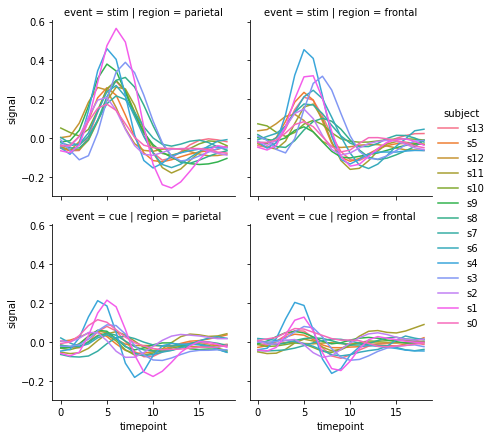

In [52]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

Если вы хотите изучить эффекты на многих уровнях переменной, может быть хорошей идеей фасетировать эту переменную в столбцы, а затем «обернуть» фасеты в строки:



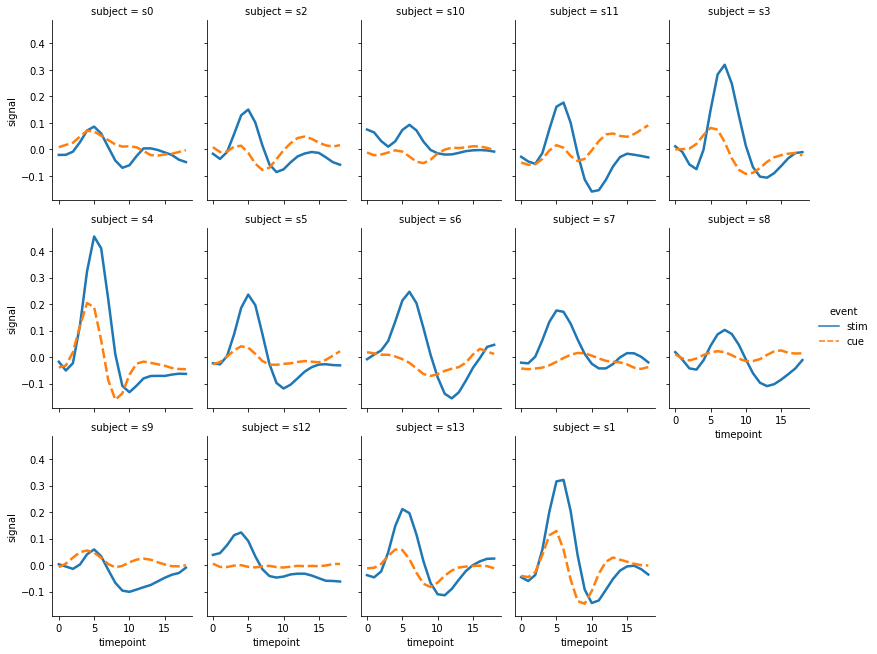

In [53]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

Эти визуализации, которые часто называют «решетчатыми» графиками или «малыми кратными», очень эффективны, поскольку они представляют данные в формате, который позволяет глазу легко обнаруживать как общие закономерности, так и отклонения от этих закономерностей. Хотя вы должны использовать гибкость, обеспечиваемую scatterplot()и relplot(), всегда старайтесь помнить, что несколько простых графиков обычно более эффективны, чем один сложный график.

###### Еще немного примеров графиков

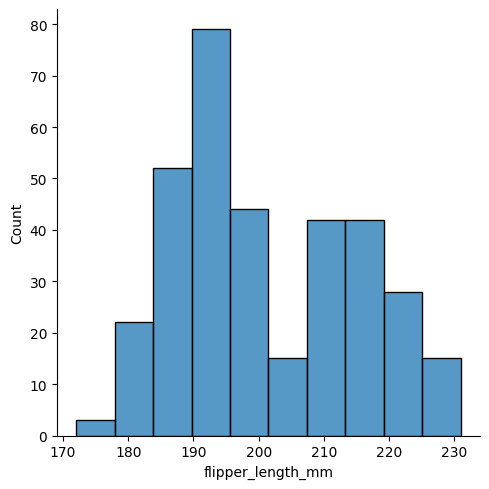

In [21]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

Набор данных о пингвинах архипелага Палмера (Антарктида), по-видимому, является заменой Ирисов. Это отличный вводной набор данных для исследования и визуализации данных.

https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris

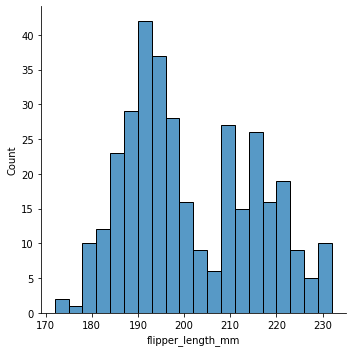

In [56]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)


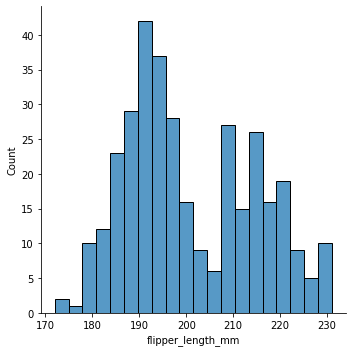

In [57]:
sns.displot(penguins, x="flipper_length_mm", bins=20)


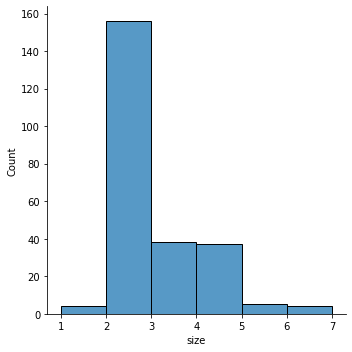

In [58]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

Этого также можно добиться, установив discrete=True, который выбирает разрывы бинов, представляющие уникальные значения в наборе данных, с столбцами, центр которых соответствует соответствующему значению.

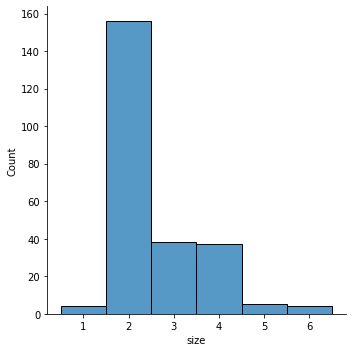

In [59]:
sns.displot(tips, x="size", discrete=True)


Также можно визуализировать распределение категориальной переменной, используя логику гистограммы. Дискретные интервалы автоматически устанавливаются для категориальных переменных, но также может быть полезно немного «сжать» столбцы, чтобы подчеркнуть категориальный характер оси:

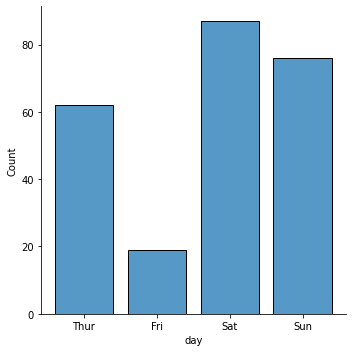

In [60]:
sns.displot(tips, x="day", shrink=.8)


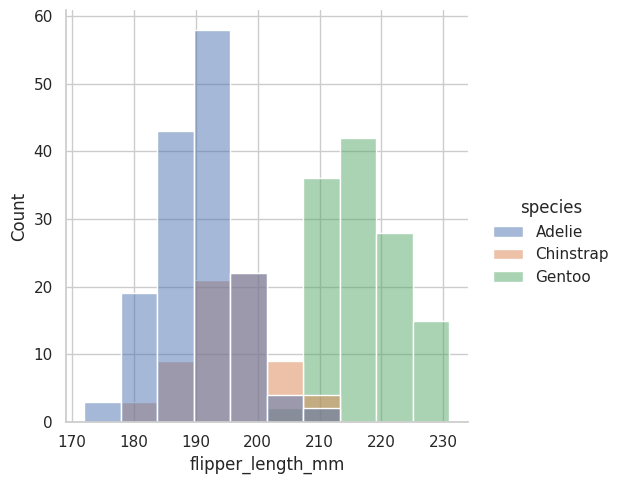

In [158]:
sns.displot(penguins, x="flipper_length_mm", hue="species")


По умолчанию разные гистограммы «накладываются» друг на друга, и в некоторых случаях их бывает трудно различить. Один из вариантов — изменить визуальное представление гистограммы с гистограммы на «ступенчатый» график:



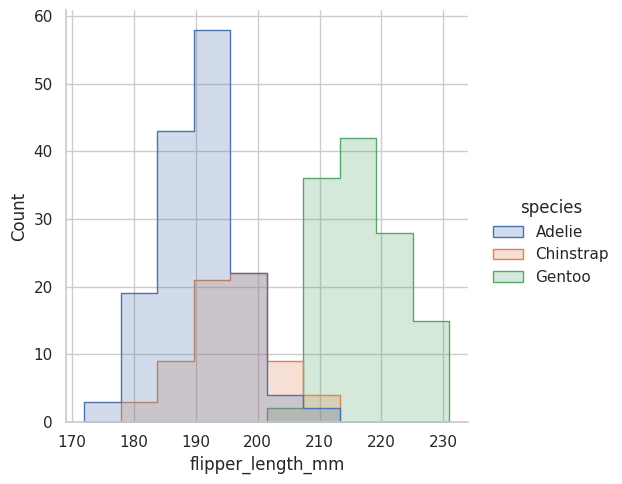

In [159]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")


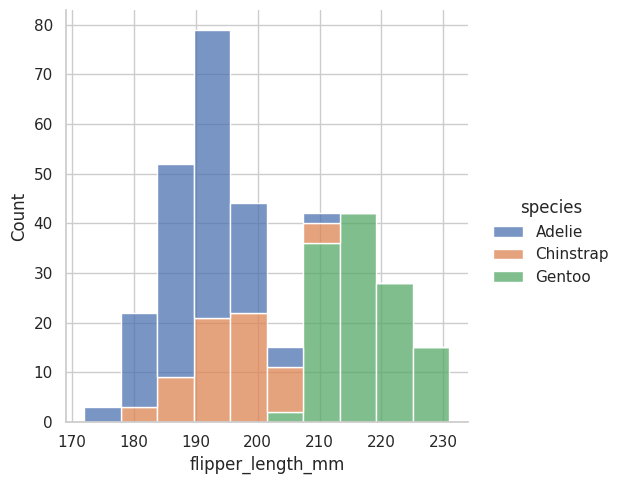

In [160]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")


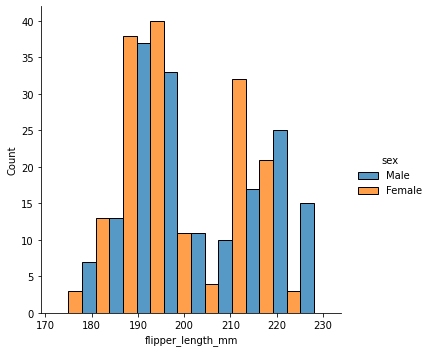

In [64]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")


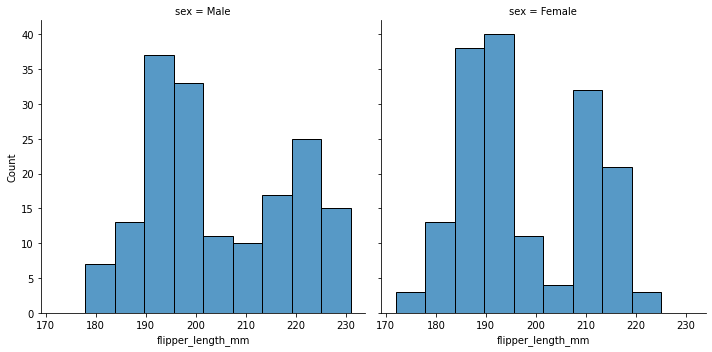

In [65]:
sns.displot(penguins, x="flipper_length_mm", col="sex")


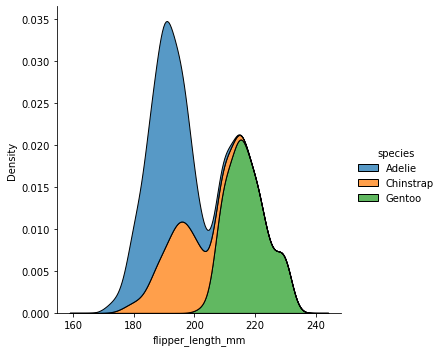

In [66]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")


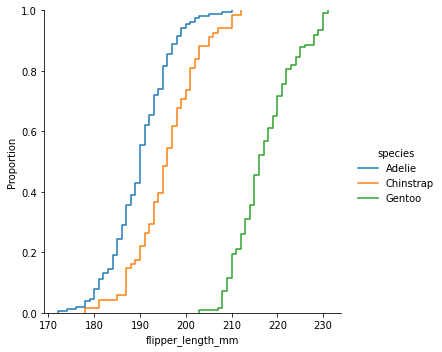

In [67]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")


###### Визуализация двумерных распределений ¶


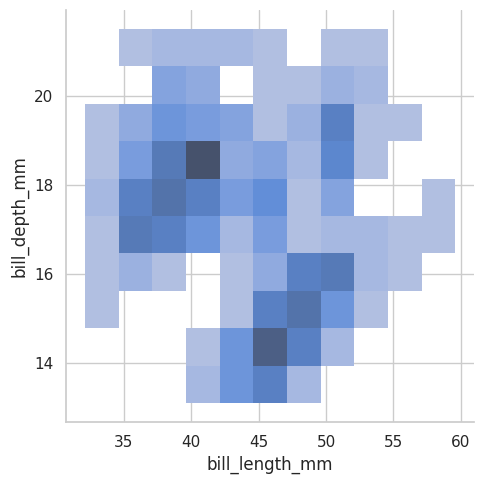

In [161]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")


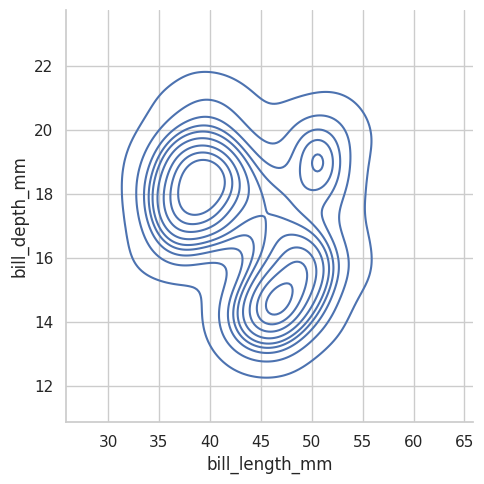

In [162]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")


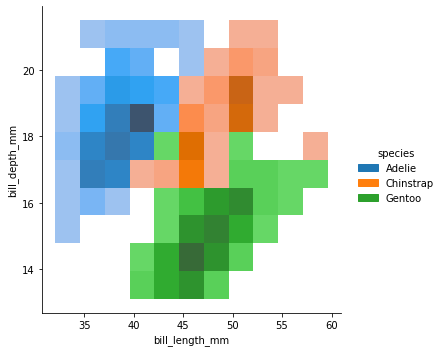

In [70]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")


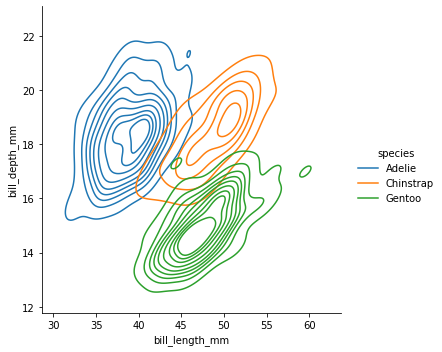

In [71]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")


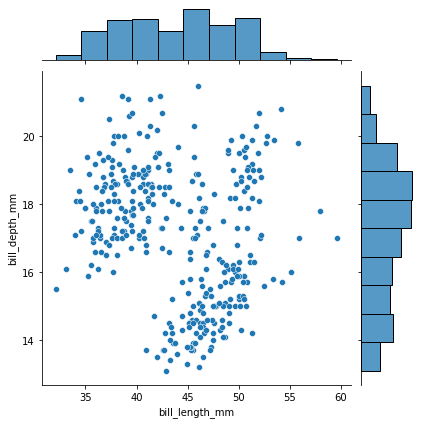

In [73]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")


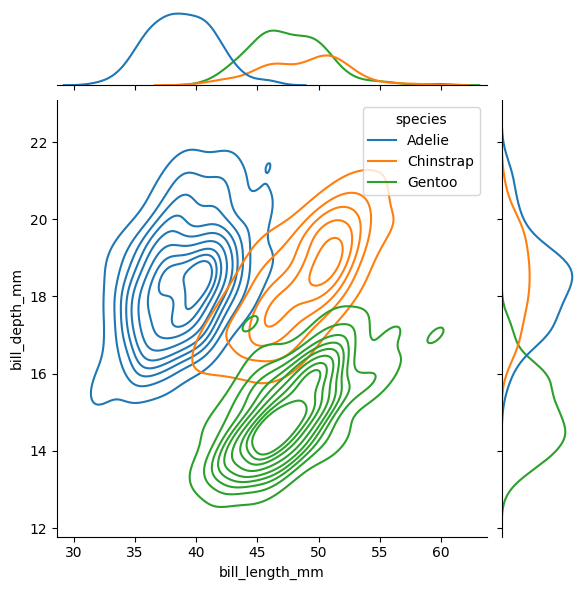

In [22]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

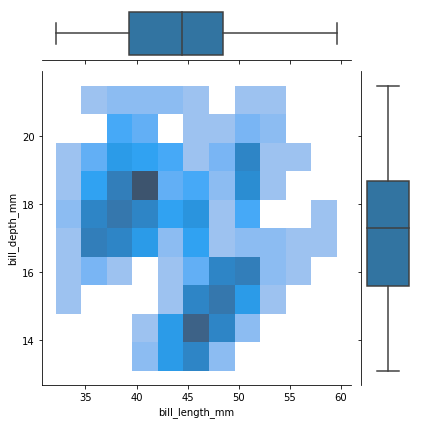

In [75]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

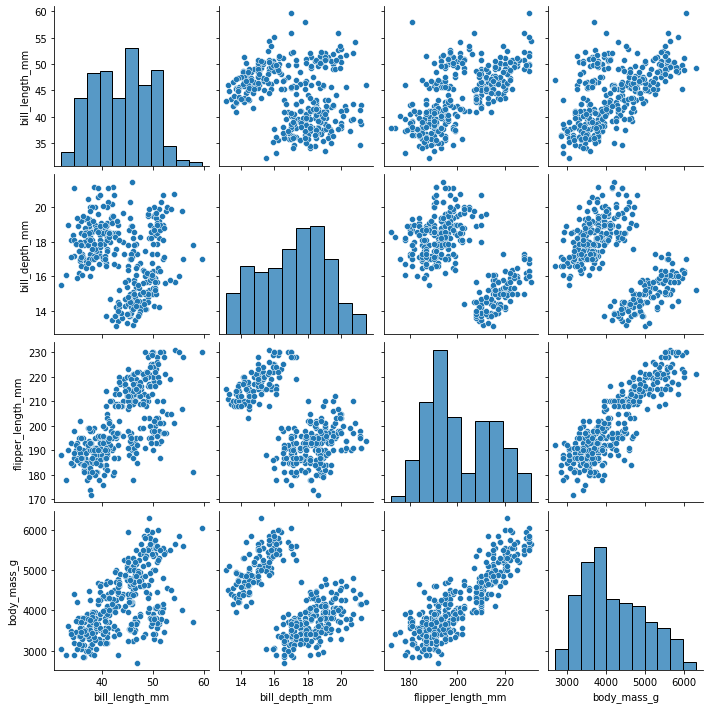

In [76]:
sns.pairplot(penguins)


## Plotly

Plotly — библиотека для визуализации данных, состоящая из нескольких частей:

    Front-End на JS
    Back-End на Python (за основу взята библиотека Seaborn)
    Back-End на R

Документация - https://plotly.com/graphing-libraries/

Так же на базе plotly и веб-сервера Flask существует специальная библиотека для создания дашбордов Dash - https://dash.plotly.com/m

Plotly - бесплатная библиотека, которую вы можете использовать в коммерческих целях

Plotly работает offline

Plotly позволяет строить интерактивные визуализации

Т.е. с помощью Plotly можно как изучать какие-то данные "на лету" (не перестраивая график в matplotlib, изменяя масштаб, включая/выключая какие-то данные), так и построить полноценный интерактивный отчёт (дашборд).



Для начала необходимо установить библиотеку, т.к. она не входит ни в стандартный пакет, ни в Anaconda. Для этого рекомендуется использовать pip:



In [23]:
!pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 10.3 MB/s eta 0:00:0000:0100:01
^C
ERROR: Operation cancelled by user


Перед началом работы необходимо импортировать модуль. В разных частях нашего занятия для разных задач нам понадобятся как основной модуль, так и один из его подмодулей, поэтому полный набор инструкций импорта у нас:



In [25]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

###### Линейный график


Начнём с простой задачи построения графика по точкам.

Используем функцию  $$f(x) = x^2$$


Сперва поступим совсем просто и "в лоб":

Создадим график с помощью функции scatter из подмодуля plotly.express (внутрь передадим 2 списка точек: координаты X и Y)

Тут же "покажем" его с помозью метода show()

Обратите внимание - график интерактивный, если навести на него курсор, то можно его приближать и удалять, выделять участки, по наведению курсора на точку получать подробную информацию, возвращать картинку в исходное положение, а при необходимости "скриншотить" и сохранять как файл.

Всё это делается с помощью JS в вашем браузере. А значит, при желании вы можете этим управлять уже после построения фигуры (но мы этого делать пожалуй не будем, т.к. JS != Python)

In [164]:
x = np.arange(0, 5, 0.1)
def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show()

Более читабельно и правильно записать тот же в код в следующем виде:



In [165]:
fig = px.scatter(x=x, y=f(x))
fig.show()

    Создаём фигуру
    Рисуем график
    Показываем фигуру

2 строчки и готовый результат. Т.к. мы используем Express. Быстро и просто.



Но маловато гибкости

In [166]:
fig = go.Figure()
#Здесь будет код
fig.show()

Чтобы добавить что на график нам понадобится метод фигуры add_trace.



fig.add_trace(ТУТ_ТО_ЧТО_ХОТИМ_ПЕРЕДАТЬ_ДЛЯ_ОТОБРАЖЕНИЯ_И_ГДЕ)



Но ЧТО мы хотим нарисовать? График по точкам. График мы уже рисовали с помощью Scatter в Экспрессе, у Объектов есть свой Scatter, давайте глянем что он делает:



In [167]:
go.Scatter(x=x, y=f(x))



Scatter({
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
                4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
    'y': array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
                3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
                1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
                3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
                5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
                9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
                1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
                1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
                2.

А теперь объединим:



In [168]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()

Как видим, отличия не только в коде, но и в результате - получилась гладкая кривая.

Кроме того, такой способ позволит нам нанести на график столько кривых, сколько мы хотим:

In [169]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x*2))
fig.show()

###### Подписи графиков



Добавим атрибут name, в который передадим строку с именем графика, которое мы хотим отображать в легенде.

Plotly поддерживает LATEX в подписях (аналогично matplotlib через использование $$ с обеих сторон).

$$f(x) = x^2$$

In [170]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

К сожалению, это имеет свои ограничения, как можно заметить подсказка при наведении на график отображается в "сыром" виде, а не в LATEX.



Победить это можно, если использовать HTML разметку в подписях. В данном примере я буду использовать тег sup. Так же заметьте, что шрифт для LATEX и HTML отличается начертанием.



In [171]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()

С увеличением длины подписи графика, легенда начала наезжать на график. Мне это не нравится, поэтому перенесём легенду вниз.

Для этого применим к фигуре метод update_layout, у которого нас интересует атрибут legend_orientation fig.update_layout(legend_orientation="h")

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h")
fig.show()

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="x+y")
fig.show()

In [36]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5])
fig.update_xaxes(range=[-0.5, 1.5])
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [37]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [38]:
def h(x):
    return np.sin(x)

def k(x):
    return np.cos(x)

def m(x):
    return np.tan(x)


fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'))

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [39]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Plot 1", "Plot 2"))

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.update_layout(title="Plot Title")
fig.update_xaxes(title='Ось X графика 1', col=1, row=1)
fig.update_xaxes(title='Ось X графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [40]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"colspan": 2}, None], [{}, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 2, 1)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 2, 1)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"))
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>', 
                         marker=dict(color=h(x), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno')
                        ))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

###### Анимация

Мы будем анимировать график построения параболы. Для этого нам понадобятся:

    Начальное состояние

    Кнопки (анимация не должна начинаться сама по себе, поэтому для начала мы создадим простую кнопку, её запускающую, а постепенно перейдём к временной шкале)

    Фреймы (или кадры) - промежуточные состояния

In [172]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


Код минимальной работоспособной кнопки выглядит так:

"updatemenus": [{"type": "buttons",
                 "buttons": [{"label": "Your Label",
                              "method": "animate",
                              "args": [See Below]}]}]

updatemenus - это один из элементов слоя, т.е. layout фигуры, а значит, мы добавим кнопку с помощью метода update_layout.



In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Пока она не будет ничего делать, т.к. у нас нечего анимировать.



In [ ]:
Фреймы

Это список "кадров" из которых состоит наша анимация.

Каждый фрейм должен содержать внутри себя целиком готовый график, который просто будет отображаться на нашей фигуре, как в декорациях.

Фрейм создаётся с помощью go.Frame()

График передаётся внутрь фрейма в аргумент data.

Таким образом, если мы хотим построить последовательность графиков (от 1 точки до целой фигуры), нам надо просто пройти в цикле:

In [45]:
frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i], y=f(x[:i]))]))

После этого фреймы необходимо передать в фигуру. У каждой фигуры есть атрибут frames, который мы и будем использовать:


In [46]:
fig.frames = frames



In [173]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>'))

frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]))]))

fig.frames = frames   

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Другой способ задать начальное состояние, слой (с кнопками) и фреймы - сразу передать всё в объект go.Figure:



In [48]:
frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]))]))
    
    
fig = go.Figure(data=go.Scatter(x=[x[0]], y=[f(x[0])], mode='lines+markers',  name='f(x)=x<sup>2</sup>'),
                frames=frames,
                layout=dict(legend_orientation="h",
                            legend=dict(x=.5, xanchor="center"),
                            updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                            margin=dict(l=0, r=0, t=0, b=0)))

fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

Естественно, если добавить на графики (как на начальный, так и те, что во фреймах) маркеры с указанием цвета, цветовой шкалы и размера, то анимация будет более сложного графика.



In [49]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[x[0]], y=[f(x)[0]], mode='lines+markers',  name='f(x)=x<sup>2</sup>',
                         marker=dict(color=h(x[0]), colorbar=dict(title="h(x)=sin(x)"), colorscale='Inferno', size=50*abs(h(x[0])))
                        ))

frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(x=x[:i+1], y=f(x[:i+1]), marker=dict(color=h(x[:i+1]), size=50*abs(h(x[:i+1]))))]))

fig.frames = frames   

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])],
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()

In [174]:
num_steps = len(x)
trace_list = [go.Scatter(visible=True, x=[x[0]], y=[f(x)[0]], mode='lines+markers', name='f(x)=x<sup>2</sup>')]

for i in range(1, len(x)):
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=f(x[:i+1]), mode='lines+markers', name='f(x)=x<sup>2</sup>'))

fig = go.Figure(data=trace_list)

steps = []
for i in range(num_steps):
    # Hide all traces
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(fig.data)],
    )
    # Enable trace we want to see
    step['args'][1][i] = True
    
    # Add step to step list
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.layout.sliders = sliders

fig.show()

In [51]:
num_steps = len(x)
trace_list = [go.Scatter(visible=True, x=[x[0]], y=[h(x)[0]], mode='lines+markers', name='h(x)=sin(x)'),
              go.Scatter(visible=True, x=[x[0]], y=[k(x)[0]], mode='lines+markers', name='k(x)=cos(x)')]

for i in range(1, len(x)):
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=h(x[:i+1]), mode='lines+markers', name='h(x)=sin(x)'))
    trace_list.append(go.Scatter(visible=False, x=x[:i+1], y=k(x[:i+1]), mode='lines+markers', name='k(x)=cos(x)'))

frames=[]
for i in range(1, len(x)):
    frames.append(go.Frame(data=[go.Scatter(visible=True, x=x[:i+1], y=h(x[:i+1]), mode='lines+markers', name='h(x)=sin(x)'),
                                 go.Scatter(visible=True, x=x[:i+1], y=k(x[:i+1]), mode='lines+markers', name='k(x)=cos(x)')])) 

fig = go.Figure(data=trace_list)

steps = []
for i in range(num_steps):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(fig.data)],
    )
    step['args'][1][2*i] = True
    step['args'][1][2*i+1] = True
    steps.append(step)

sliders = [dict(
    steps = steps,
)]

fig.update_layout(updatemenus=[dict(direction="left", x=0.5, xanchor="center", y=0,
                                    type="buttons", buttons=[dict(label="▶", method="animate", args=[None, {"fromcurrent": True}]),
                                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                                               "mode": "immediate",
                                                                                                               "transition": {"duration": 0}}])])],
                  )


fig.layout.sliders = sliders
fig.frames = frames  

fig.show()

In [52]:
cities = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [175]:
def to_int_size(value):
    try:
        return np.log10(int(value))
    except:
        return np.log10(int(value.split('[')[0]))

fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], 
                                 lon=cities['geo_lon'], 
                                 text=cities['city'],
                                 marker=dict(size=cities['population'].map(to_int_size))))
map_center = go.layout.mapbox.Center(lat=(cities['geo_lat'].max()+cities['geo_lat'].min())/2, 
                                     lon=(cities['geo_lon'].max()+cities['geo_lon'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()
train_russia = pd.read_csv('https://gist.githubusercontent.com/lexnekr/2da07b5fc12b5be24068e4d68ed47ca5/raw/d6256765a3223282fbfec7e0b040cbfb21593fff/train_russia.scv')

fig = go.Figure(go.Scattermapbox(legendgroup="group",
                                 name='Города России',
                                 lat=cities['geo_lat'], 
                                 lon=cities['geo_lon'], 
                                 text=cities['city'],
                                 marker=dict(colorbar=dict(title="Год основания"),
                                             color=cities['foundation_year'].map(to_int_year),
                                             size=cities['population'].map(to_int_size))))

for df_for_today in train_russia.groupby(['day number']):
    fig.add_trace(go.Scattermapbox(name='День {}'.format(df_for_today[0]),
                                   mode = "lines",
                                   hoverinfo='skip',
                                   lat=df_for_today[1]['geo_lat'],
                                   lon=df_for_today[1]['geo_lon']))    

map_center = go.layout.mapbox.Center(lat=(cities['geo_lat'].max()+cities['geo_lat'].min())/2, 
                                     lon=(cities['geo_lon'].max()+cities['geo_lon'].min())/2)
fig.update_layout(title='По России на поезде',
                  legend_orientation="h",
                  mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))

fig.show()

NameError: name 'to_int_year' is not defined

https://habr.com/ru/post/502958/

https://github.com/lexnekr/plotly_lesson/blob/master/plotly_lesson.ipynb

## BOKEH

Основная концепция Bokeh заключается в том, что графики строятся по одному слою за раз. Мы начинаем с создания фигуры, а затем добавляем элементы, называемыеглифы, к рисунку. (Для тех, кто использовал ggplot, идея глифов по сути та же, что и у геом, которые добавляются к графу по одному «слою» за раз.) Глифы могут принимать множество форм в зависимости от желаемого использования: круги, линии , патчи, бары, дуги и так далее. Давайте проиллюстрируем идею глифов, сделав базовую диаграмму с квадратами и кругами. Во-первых, мы строим сюжет, используяfigureметод, а затем мы добавляем наши глифы к графику, вызывая соответствующий метод и передавая данные. Наконец, мы показываем наш график 

In [54]:
!pip install bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.6 MB/s eta 0:00:00


In [62]:
!pip install jupyter_bokeh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.7/779.7 KB 4.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jupyter_bokeh: filename=jupyter_bokeh-3.0.5-py3-none-any.whl size=1398357 sha256=051395028e26a1b16b765c40c507453532388ba5367d1a1e064a4c9dd66e694e
  Stored in directory: /home/daniel/.cache/pip/wheels/bb/a5/15/537feea03d86d8e9de2869d6d28eb983c96f746ddb96dcc58b
Successfully built jupyter_bokeh


https://chel-center.ru/python-yfc/2021/01/11/bokeh-nbsp-mdash-interaktivnaya-infografika-na-python/

In [64]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [176]:
opts = dict(width=250, height=250, min_border=0)


In [177]:

p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t = show(row(p1, p2), notebook_handle=True)

In [178]:
t


In [179]:
# this will update the left plot circle color with an explicit handle
r1.glyph.fill_color = "white"
push_notebook(handle=t)

In [180]:

# and this will update the right plot circle color because it was in the last shown cell
r2.glyph.fill_color = "pink"
push_notebook()

In [182]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [181]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [183]:
p = figure(title="simple line example", height=300, width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

In [184]:

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [185]:
show(p, notebook_handle=True)


In [81]:
interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))


interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>

## Статическая динамика

###### Ipywidgets

In [82]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 3.7 MB/s eta 0:00:00a 0:00:01


In [83]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [84]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

In [85]:

def say_something(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Widget says: {x}')
 
widgets.interact(say_something, x=[0, 1, 2, 3])
widgets.interact(say_something, x=(0, 10, 1))
widgets.interact(say_something, x=(0, 10, .5))
_ = widgets.interact(say_something, x=True)

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3), value=0), Output()), _dom_classes=('widg…

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html

In [86]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 2 * np.pi)

def update(w = 1.0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(w * x))

    fig.canvas.draw()

interact(update);

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [87]:

from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["FlowerType"] = iris.target #[iris.target_names[t] for t in iris.target]

iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   FlowerType  
0           0  
1           0  
2           0  
3           0  
4           0

In [88]:
def create_scatter(feature1, feature2):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(8,4))

        plt.scatter(x = iris_df[feature1],
                    y = iris_df[feature2],
                    c=iris_df["FlowerType"],
                    s=20
                   )

        plt.xlabel(feature1.capitalize())
        plt.ylabel(feature2.capitalize())

        plt.title("%s vs %s"%(feature1.capitalize(), feature2.capitalize()))

In [89]:
widgets.interact(create_scatter, feature1=iris.feature_names, feature2=iris.feature_names);


interactive(children=(Dropdown(description='feature1', options=('sepal length (cm)', 'sepal width (cm)', 'peta…

In [90]:
def f(x):
    return f"The selected value is '{x}'"

widgets.interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [186]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [187]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   FlowerType  
0           0  
1           0  
2           0  
3           0  
4           0

In [188]:
parametrs=iris_df.columns.to_list()

In [189]:
parametrs

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'FlowerType']

In [95]:
def simpleplot(Параметр):
    df=iris_df
    df[[Параметр]].plot()        
interact(simpleplot,  Параметр=parametrs)


interactive(children=(Dropdown(description='Параметр', options=('sepal length (cm)', 'sepal width (cm)', 'peta…

<function __main__.simpleplot(Параметр)>

In [96]:
def norm(x, Параметр1, Параметр2):
    
    dat1 = iris_df[[Параметр1, Параметр2,]]
    dat1.plot()
    dat1_norm = (dat1 - dat1.mean()) / (dat1.max() - dat1.min())
    dat2 = dat1_norm.rolling(x, win_type="triang").sum()
    dat2.plot() 
        
interact(norm, x=(1, 100),  Параметр1=parametrs, Параметр2=parametrs)

interactive(children=(IntSlider(value=50, description='x', min=1), Dropdown(description='Параметр1', options=(…

<function __main__.norm(x, Параметр1, Параметр2)>

In [97]:
def corrmap(Параметр1, Параметр2, Параметр3, Параметр4, Параметр5, Параметр6):
    df=iris_df
    dfn=df[[Параметр1, Параметр2, Параметр3, Параметр4, Параметр5, Параметр6]]
    corr = dfn.corr()
    sns.heatmap(
    corr, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values);

interact(corrmap,  Параметр1=parametrs, Параметр2=parametrs, Параметр3=parametrs, Параметр4=parametrs, Параметр5=parametrs, Параметр6=parametrs)

interactive(children=(Dropdown(description='Параметр1', options=('sepal length (cm)', 'sepal width (cm)', 'pet…

<function __main__.corrmap(Параметр1, Параметр2, Параметр3, Параметр4, Параметр5, Параметр6)>

## Clustergram

пакет Python для генерации кластерограмм из решений кластеризации. Библиотека была разработана в рамках исследовательского проекта Urban Grammar и совместима со scikit-learn и библиотеками с поддержкой GPU, такими как cuML или cuDF в рамках RAPIDS.AI.ь

Когда мы хотим провести кластерный анализ для выявления групп в наших данных, мы часто используем алгоритмы типа метода k-средних, которые требуют задания количества кластеров. Но проблема в том, что мы обычно не знаем, сколько кластеров существует.



Существует множество методов определения правильного числа, например силуэты или локтевой сгиб. Но они обычно не дают представления о том, что происходит между различными вариантами, поэтому цифры немного абстрактны.



Маттиас Шонлау предложил другой подход — кластерограмму. Кластерограмма — это двухмерный график, отражающий потоки наблюдений между классами по мере добавления кластеров. Это говорит вам о том, как перетасовываются ваши данные и насколько хороши ваши сплиты. Тал Галили позже реализовал кластерограмму для k-средних в R. Автор использовал реализацию Таля, перенёс ее на Python и создал clustergram — пакет Python для создания кластерограмм.

clustergram в настоящее время поддерживает метод k-средних, использование scikit-learn (включая реализацию Mini-Batch) и RAPIDS.AI cuML (если у вас есть GPU с поддержкой CUDA), Gaussian Mixture Model (только scikit-learn) и иерархическую кластеризацию на основе scipy.hierarchy. В качестве альтернативы мы можем создать кластерограмму на основе меток и данных, полученных с помощью альтернативных пользовательских алгоритмов кластеризации. Пакет предоставляет API, подобный sklearn, и строит кластерные диаграммы с помощью matplotlib, что даёт ему широкий выбор вариантов оформления в соответствии со стилем вашей публикации.



In [98]:
!pip install clustergram
!pip install urbangrammar_graphics 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 7.8 MB/s eta 0:00:00


В любом случае вам нужно установить выбранный бэкенд (scikit-learn и scipy или cuML).



In [99]:
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

sns.set(style='whitegrid')

Text(0.5, 1.01, 'Iris flowers')

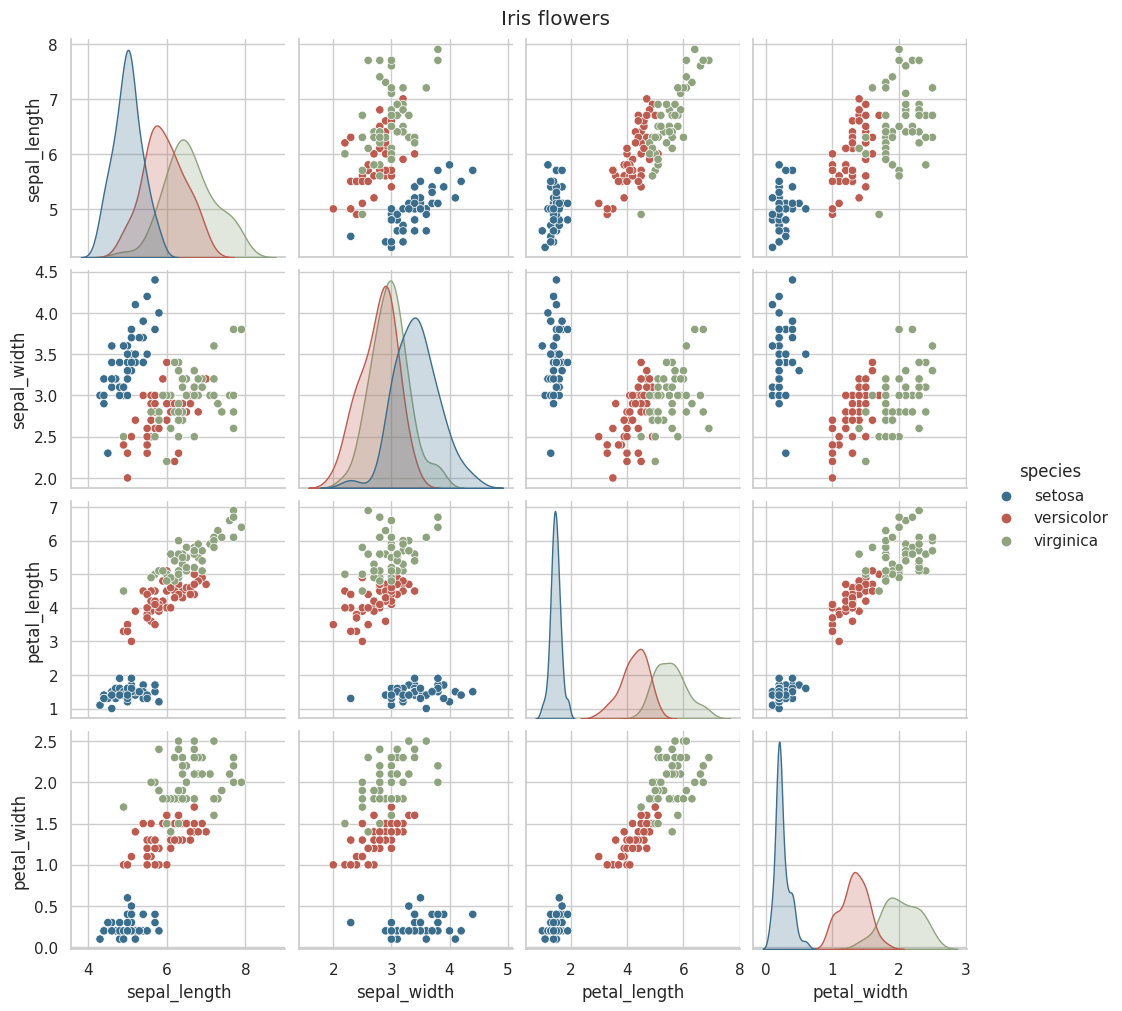

In [100]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette=ugg.COLORS[1:4])
g.fig.suptitle("Iris flowers", y=1.01)

Похоже, что setosa — относительно чётко определённая группа, тогда как разница между versicolor и virginica меньше, поскольку они частично перекрываются (или, в случае ширины чашелистика, полностью).



Итак, мы знаем, как выглядят данные. Теперь мы можем увидеть кластерограмму. Помните, мы знаем, что существует три кластера, и в идеале мы должны быть в состоянии распознать это по кластерограмме. Я говорю “в идеале”, потому что, даже если есть известные метки, это не значит, что наши данные или метод кластеризации способны различать эти классы.



Давайте начнём с кластеризации методом k-средних. Чтобы получить стабильный результат, мы можем запустить кластерную программу с 1000 инициализаций.



K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.8358995914459229 seconds.
K=3 fitted in 0.7401149272918701 seconds.
K=4 fitted in 0.7370939254760742 seconds.
K=5 fitted in 0.9888560771942139 seconds.
K=6 fitted in 1.1893086433410645 seconds.
K=7 fitted in 1.2887823581695557 seconds.
K=8 fitted in 1.1572365760803223 seconds.
K=9 fitted in 1.519958257675171 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

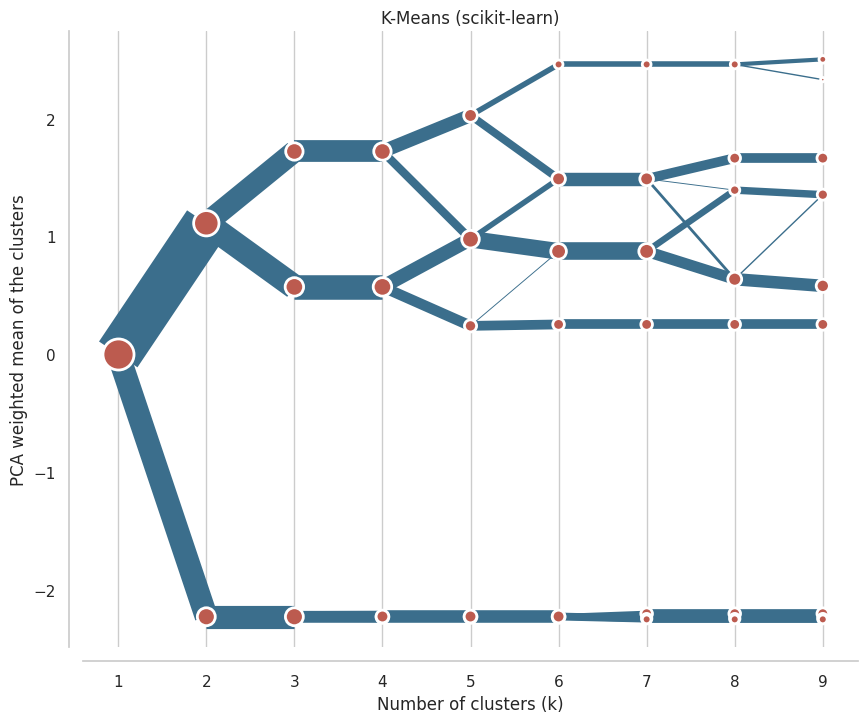

In [101]:
data = scale(iris.drop(columns=['species']))

cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

На оси x мы видим количество кластеров. Точки представляют собой центр каждого кластера (по умолчанию), взвешенный по первой главной компоненте (это помогает сделать диаграмму более читабельной). Линии, соединяющие точки, и их толщина представляют наблюдения, перемещающиеся между кластерами. Поэтому мы можем прочитать, когда новые кластеры образуются как расщепление одного существующего класса и когда они образуются на основе наблюдений из двух кластеров.



Мы ищем разделение, т. е. отвечаем на вопрос, принёс ли дополнительный кластер какое-либо значимое разделение? Шаг от одного кластера к двум большой — хорошее и чёткое разделение. От двух до трёх — свидетельство довольно хорошего раскола в верхней ветви. Но с 3 по 4 видимой разницы нет, потому что новый четвёртый кластер почти не отличается от существующей нижней ветви. Хотя сейчас она разделена на две части, это разделение не даёт нам много информации. Таким образом, можно сделать вывод, что идеальное количество кластеров для данных Iris — три.



# TQDM - IDDQD для DS`a

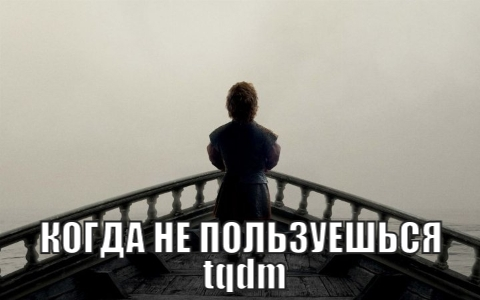

In [190]:
import time
from tqdm import tqdm
for i in tqdm(range(100)):
    time.sleep(1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:40<00:00,  1.00s/it]


In [192]:
from tqdm.auto import tqdm, trange
from time import sleep

bar = trange(10)
for i in bar:
    # Print using tqdm class method .write()
    sleep(0.1)
    if not (i % 3):
        tqdm.write("Done task %i" % i)
    # Can also use bar.write()

  0%|          | 0/10 [00:00<?, ?it/s]

Done task 0
Done task 3
Done task 6
Done task 9


https://github.com/tqdm/tqdm

# Сохранение моделей

## Pickle

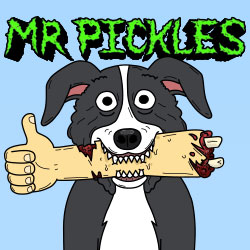

Pickle - это стандартный способ сериализации объектов в Python.

In [193]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [194]:
# save the model to disk
filename = 'finalized_model.sav'


In [8]:
pickle.dump(model, open(filename, 'wb'))

---

In [9]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [10]:
result = loaded_model.score(X_test, Y_test)
print(result)


0.7874015748031497


Немного усложним

In [12]:
 from sklearn.linear_model import LogisticRegression 
 from sklearn.datasets import load_iris 
 from sklearn.model_selection import train_test_split 
 
 # Load and split data 
 data = load_iris() 
 Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.3, random_state=4) 

In [19]:
 model = LogisticRegression(C=0.1, 
 max_iter=20, 
 fit_intercept=True, 
 n_jobs=4, 
 solver='liblinear') 
 model.fit(Xtrain, Ytrain) 

/mnt/c/ds/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(C=0.1, max_iter=20, n_jobs=4, solver='liblinear')

In [20]:
model.coef_ 

array([[ 0.14581391,  0.66326446, -1.08472348, -0.4730456 ],
       [ 0.08769022, -0.54987377,  0.23139425, -0.25753471],
       [-0.56586916, -0.45528042,  0.80532348,  0.69638572]])

In [ ]:
 import pickle 


Сохраняем модель

In [22]:
pkl_filename = "pickle_model.pkl" 
with open(pkl_filename, 'wb') as file: 
 pickle.dump(model, file) 

Загружаем модель

In [24]:
# Load from file 
with open(pkl_filename, 'rb') as file: 
    pickle_model = pickle.load(file) 

In [26]:
score = pickle_model.score(Xtest, Ytest) 
print("Test score: {0:.2f} %".format(100 * score)) 
Ypredict = pickle_model.predict(Xtest) 

Test score: 91.11 %


## Модуль Joblib


In [30]:
from sklearn.externals import joblib - БОЛЬШЕ НЕ РАБОТАЕТ


ImportError: cannot import name 'joblib' from 'sklearn.externals' (/mnt/c/ds/env/lib/python3.8/site-packages/sklearn/externals/__init__.py)

In [102]:
import joblib


In [103]:
 from sklearn.linear_model import LogisticRegression 
 from sklearn.datasets import load_iris 
 from sklearn.model_selection import train_test_split 
 
 # Load and split data 
 data = load_iris() 
 Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.3, random_state=4) 

In [104]:
 model = LogisticRegression(C=0.1, 
 max_iter=20, 
 fit_intercept=True, 
 n_jobs=4, 
 solver='liblinear') 
 model.fit(Xtrain, Ytrain) 

/mnt/c/c/ds/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.



LogisticRegression(C=0.1, max_iter=20, n_jobs=4, solver='liblinear')

Сохраняем модель

In [105]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

Загружаем модель

In [106]:
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest)
print(result)

0.9111111111111111


Joblib предлагает немного более простой рабочий процесс по сравнению с Pickle. В то время как Pickle требует передачи файлового объекта в качестве аргумента, Joblib работает как с файловыми объектами, так и с строковыми именами файлов. Если ваша модель содержит большие массивы данных, каждый массив будет храниться в отдельном файле, но процедура сохранения и восстановления останется прежней. Joblib также поддерживает различные методы сжатия, такие как zlib, gzip, bz2, а также различные уровни сжатия.

Совместимость версий Python. В документации к обоим инструментам указано, что не рекомендуется (де) сериализовать объекты в разных версиях Python, хотя это может работать при изменении второстепенных версий.

Совместимость модели. Одна из наиболее частых ошибок - сохранение модели с помощью Pickle или Joblib, а затем изменение модели перед попыткой восстановления из файла. Внутренняя структура модели должна оставаться неизменной между сохранением и перезагрузкой.

Последняя проблема с Pickle и Joblib связана с безопасностью. Оба инструмента могут содержать вредоносный код, поэтому не рекомендуется восстанавливать данные из ненадежных или непроверенных источников.